![image](../questions/q1.jpg)

![image](../questions/q11.jpg)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
credit = pd.read_csv('../input/credit.csv')

In [3]:
credit      #   show data

,CustID,Age,Province,Years,CreditLimit,Payment,Min_payment,Ndefault,Balance,Balance_Freq,N_purchases,LastPurchase,MaxPurchase,Inst_purchase,Advance,Count_Advance_Tx,Purchase_Freq,Installment_Freq,Advance_Freq,Pct_full_payment
0,1,33,Bangkok,5,300000.0,57728.13158,4721.03929,1,14092.56223,0.900000,24,45696.5,17489.4,28207.1,23301.107800,0.700000,0.600000,0.400000,5,0.000000
1,2,80,Bangkok,7,280000.0,265570.97240,5860.29097,0,31083.93701,0.900000,55,265823.4,151589.0,114234.4,0.000000,0.900000,0.800000,0.000000,0,0.875000
2,3,43,Bangkok,7,250000.0,13891.67981,2628.26661,0,1775.92802,1.000000,25,14715.5,14715.5,0.0,0.000000,1.000000,0.000000,0.000000,0,0.916667
3,4,25,Phuket,6,230000.0,12120.54219,687.25483,1,431.03899,0.454545,2,3700.0,3700.0,0.0,0.000000,0.166667,0.000000,0.000000,0,0.000000
4,5,22,Bangkok,6,225000.0,469305.98240,29740.69421,0,115475.20010,1.000000,101,490395.7,407612.5,82783.2,3349.001316,1.000000,0.916667,0.083333,1,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,9186,23,Bangkok,3,0.0,3255.94462,488.86365,0,284.93517,1.000000,6,2911.2,0.0,2911.2,0.000000,1.000000,0.833333,0.000000,0,0.500000
8946,9187,24,Phuket,3,0.0,2758.61322,0.00000,0,191.83215,1.000000,6,3000.0,0.0,3000.0,0.000000,1.000000,0.833333,0.000000,0,0.000000
8947,9188,23,Bangkok,3,0.0,812.70775,824.18369,0,233.98673,0.833333,5,1444.0,0.0,1444.0,0.000000,0.833333,0.666667,0.000000,0,0.250000
8948,9189,22,Phuket,3,0.0,525.49959,557.55628,0,134.57564,0.833333,0,0.0,0.0,0.0,219.352668,0.000000,0.000000,0.166667,2,0.250000


In [4]:
#  remove some columns that are likely not to be used anymore

credit = credit.drop(columns = ['CustID', 'Count_Advance_Tx', 'Province'])
credit

,Age,Years,CreditLimit,Payment,Min_payment,Ndefault,Balance,Balance_Freq,N_purchases,LastPurchase,MaxPurchase,Inst_purchase,Advance,Purchase_Freq,Installment_Freq,Advance_Freq,Pct_full_payment
0,33,5,300000.0,57728.13158,4721.03929,1,14092.56223,0.900000,24,45696.5,17489.4,28207.1,23301.107800,0.600000,0.400000,5,0.000000
1,80,7,280000.0,265570.97240,5860.29097,0,31083.93701,0.900000,55,265823.4,151589.0,114234.4,0.000000,0.800000,0.000000,0,0.875000
2,43,7,250000.0,13891.67981,2628.26661,0,1775.92802,1.000000,25,14715.5,14715.5,0.0,0.000000,0.000000,0.000000,0,0.916667
3,25,6,230000.0,12120.54219,687.25483,1,431.03899,0.454545,2,3700.0,3700.0,0.0,0.000000,0.000000,0.000000,0,0.000000
4,22,6,225000.0,469305.98240,29740.69421,0,115475.20010,1.000000,101,490395.7,407612.5,82783.2,3349.001316,0.916667,0.083333,1,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,23,3,0.0,3255.94462,488.86365,0,284.93517,1.000000,6,2911.2,0.0,2911.2,0.000000,0.833333,0.000000,0,0.500000
8946,24,3,0.0,2758.61322,0.00000,0,191.83215,1.000000,6,3000.0,0.0,3000.0,0.000000,0.833333,0.000000,0,0.000000
8947,23,3,0.0,812.70775,824.18369,0,233.98673,0.833333,5,1444.0,0.0,1444.0,0.000000,0.666667,0.000000,0,0.250000
8948,22,3,0.0,525.49959,557.55628,0,134.57564,0.833333,0,0.0,0.0,0.0,219.352668,0.000000,0.166667,2,0.250000


In [5]:
credit.info()         #   see data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               8950 non-null   int64  
 1   Years             8950 non-null   int64  
 2   CreditLimit       8950 non-null   float64
 3   Payment           8950 non-null   float64
 4   Min_payment       8950 non-null   float64
 5   Ndefault          8950 non-null   int64  
 6   Balance           8950 non-null   float64
 7   Balance_Freq      8950 non-null   float64
 8   N_purchases       8950 non-null   int64  
 9   LastPurchase      8950 non-null   float64
 10  MaxPurchase       8950 non-null   float64
 11  Inst_purchase     8950 non-null   float64
 12  Advance           8950 non-null   float64
 13  Purchase_Freq     8950 non-null   float64
 14  Installment_Freq  8950 non-null   float64
 15  Advance_Freq      8950 non-null   int64  
 16  Pct_full_payment  8950 non-null   float64


In [6]:
credit.describe()

,Age,Years,CreditLimit,Payment,Min_payment,Ndefault,Balance,Balance_Freq,N_purchases,LastPurchase,MaxPurchase,Inst_purchase,Advance,Purchase_Freq,Installment_Freq,Advance_Freq,Pct_full_payment
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,26.549832,5.807821,31511.873491,17331.438520,8339.834532,0.057207,15644.748277,0.877271,14.709832,10032.048335,5924.373709,4110.676447,5873.226675,0.364437,0.135144,3.248827,0.153715
std,6.197564,0.626763,40328.877230,28950.637569,23359.899181,0.232250,20815.318795,0.236904,24.857649,21366.347819,16598.879174,9043.381152,12582.983260,0.397448,0.200121,6.824647,0.292499
min,20.000000,3.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,6.000000,0.000000,3832.761660,1630.281637,0.000000,1282.819155,0.888889,1.000000,396.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,6.000000,15000.000000,8569.015460,2896.284025,0.000000,8733.852310,1.000000,7.000000,3612.800000,380.000000,890.000000,0.000000,0.166667,0.000000,0.000000,0.000000
75%,29.000000,6.000000,55000.000000,19011.343167,7887.135008,0.000000,20541.400355,1.000000,17.000000,11101.300000,5774.050000,4686.375000,6682.926836,0.750000,0.222222,4.000000,0.142857
max,85.000000,7.000000,300000.000000,507214.833600,764062.075200,1.000000,190431.385600,1.000000,358.000000,490395.700000,407612.500000,225000.000000,282823.270600,1.000000,1.500000,123.000000,1.000000


## elbow method

In [7]:
wcss = []     #   blank list

In [8]:
# test for 2 to 10 clusters

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(credit)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    metrics.silhouette_score(credit, labels, metric = 'euclidean')
    print("silhouette_score of k = " + str(k) + " : {:.2f}  ".format(metrics.silhouette_score(credit, labels,
                                                                                              metric = 'euclidean')))

silhouette_score of k = 2:0.50  
silhouette_score of k = 3:0.48  
silhouette_score of k = 4:0.49  
silhouette_score of k = 5:0.48  
silhouette_score of k = 6:0.41  
silhouette_score of k = 7:0.41  
silhouette_score of k = 8:0.40  
silhouette_score of k = 9:0.38  
silhouette_score of k = 10:0.39  


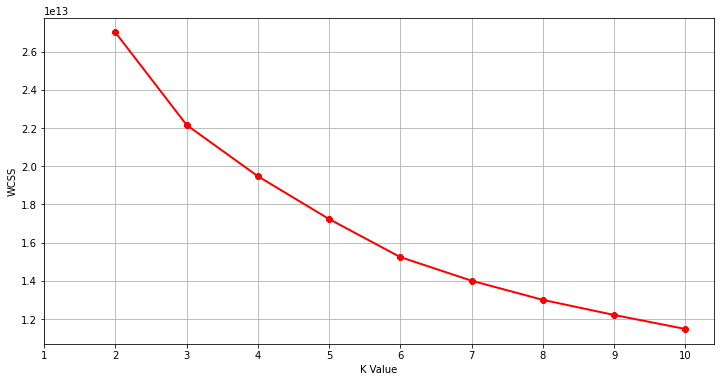

In [9]:
plt.figure(figsize = (12,6))        
plt.grid()             
plt.plot(range(2,11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, random_state = 0)      #  separate into three groups

In [10]:
kmeans.fit(credit)                  #  training
kmeans.cluster_centers_             #  see centroid

array([[3.12272925e+01, 5.93828770e+00, 8.49280155e+04, 2.41906912e+04,
        1.15120680e+04, 1.20817036e-01, 2.86496654e+04, 9.23822350e-01,
        2.02055628e+01, 1.36757299e+04, 8.43339870e+03, 5.24254420e+03,
        9.76651780e+03, 3.81548912e-01, 1.73123380e-01, 4.45501956e+00,
        1.56296859e-01],
       [2.45343606e+01, 5.75577812e+00, 1.06464413e+04, 1.13122930e+04,
        6.74076174e+03, 3.17411402e-02, 1.02847504e+04, 8.59719078e-01,
        1.10986133e+01, 6.50638324e+03, 3.43596915e+03, 3.07444433e+03,
        3.97674458e+03, 3.52462901e-01, 1.20156674e-01, 2.71078582e+00,
        1.48205976e-01],
       [4.11257862e+01, 6.04402516e+00, 1.10166667e+05, 1.63753539e+05,
        2.77025595e+04, 1.76100629e-01, 4.62238162e+04, 9.20005987e-01,
        8.25786164e+01, 1.01211011e+05, 7.11852484e+04, 3.00271465e+04,
        2.69405594e+04, 6.05571899e-01, 1.97275981e-01, 7.75471698e+00,
        3.41196528e-01]])

In [11]:
# show each group data (cluster center)

credit_group = pd.DataFrame(np.array([[3.12272925e+01, 5.93828770e+00, 8.49280155e+04, 2.41906912e+04,
                                       1.15120680e+04, 1.20817036e-01, 2.86496654e+04, 9.23822350e-01,
                                       2.02055628e+01, 1.36757299e+04, 8.43339870e+03, 5.24254420e+03,
                                       9.76651780e+03, 3.81548912e-01, 1.73123380e-01, 4.45501956e+00,
                                       1.56296859e-01],
                                      [2.45343606e+01, 5.75577812e+00, 1.06464413e+04, 1.13122930e+04,
                                       6.74076174e+03, 3.17411402e-02, 1.02847504e+04, 8.59719078e-01,
                                       1.10986133e+01, 6.50638324e+03, 3.43596915e+03, 3.07444433e+03,
                                       3.97674458e+03, 3.52462901e-01, 1.20156674e-01, 2.71078582e+00,
                                       1.48205976e-01],
                                      [4.11257862e+01, 6.04402516e+00, 1.10166667e+05, 1.63753539e+05,
                                       2.77025595e+04, 1.76100629e-01, 4.62238162e+04, 9.20005987e-01,
                                       8.25786164e+01, 1.01211011e+05, 7.11852484e+04, 3.00271465e+04,
                                       2.69405594e+04, 6.05571899e-01, 1.97275981e-01, 7.75471698e+00,
                                       3.41196528e-01]]),
                            
                            columns = ['Age','Years','CreditLimit','Payment','Min_payment',
                                       'Ndefault','Balance','Balance_Freq','N_purchases','LastPurchase',
                                       'MaxPurchase','Inst_purchase','Advance','Purchase_Freq','Installment_Freq',
                                       'Advance_Freq','Pct_full_paymen'])
credit_group

,Age,Years,CreditLimit,Payment,Min_payment,Ndefault,Balance,Balance_Freq,N_purchases,LastPurchase,MaxPurchase,Inst_purchase,Advance,Purchase_Freq,Installment_Freq,Advance_Freq,Pct_full_paymen
0,31.227293,5.938288,84928.0155,24190.6912,11512.06800,0.120817,28649.6654,0.923822,20.205563,13675.72990,8433.39870,5242.54420,9766.51780,0.381549,0.173123,4.455020,0.156297
1,24.534361,5.755778,10646.4413,11312.2930,6740.76174,0.031741,10284.7504,0.859719,11.098613,6506.38324,3435.96915,3074.44433,3976.74458,0.352463,0.120157,2.710786,0.148206
2,41.125786,6.044025,110166.6670,163753.5390,27702.55950,0.176101,46223.8162,0.920006,82.578616,101211.01100,71185.24840,30027.14650,26940.55940,0.605572,0.197276,7.754717,0.341197


In [12]:
y_kmeans = kmeans.predict(credit)     #  predict
y_kmeans

array([0, 2, 0, ..., 1, 1, 1])

In [13]:
# add cluster ID into the data

credit['cluster'] = y_kmeans
credit

,Age,Years,CreditLimit,Payment,Min_payment,Ndefault,Balance,Balance_Freq,N_purchases,LastPurchase,MaxPurchase,Inst_purchase,Advance,Purchase_Freq,Installment_Freq,Advance_Freq,Pct_full_payment,cluster
0,33,5,300000.0,57728.13158,4721.03929,1,14092.56223,0.900000,24,45696.5,17489.4,28207.1,23301.107800,0.600000,0.400000,5,0.000000,0
1,80,7,280000.0,265570.97240,5860.29097,0,31083.93701,0.900000,55,265823.4,151589.0,114234.4,0.000000,0.800000,0.000000,0,0.875000,2
2,43,7,250000.0,13891.67981,2628.26661,0,1775.92802,1.000000,25,14715.5,14715.5,0.0,0.000000,0.000000,0.000000,0,0.916667,0
3,25,6,230000.0,12120.54219,687.25483,1,431.03899,0.454545,2,3700.0,3700.0,0.0,0.000000,0.000000,0.000000,0,0.000000,0
4,22,6,225000.0,469305.98240,29740.69421,0,115475.20010,1.000000,101,490395.7,407612.5,82783.2,3349.001316,0.916667,0.083333,1,0.250000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,23,3,0.0,3255.94462,488.86365,0,284.93517,1.000000,6,2911.2,0.0,2911.2,0.000000,0.833333,0.000000,0,0.500000,1
8946,24,3,0.0,2758.61322,0.00000,0,191.83215,1.000000,6,3000.0,0.0,3000.0,0.000000,0.833333,0.000000,0,0.000000,1
8947,23,3,0.0,812.70775,824.18369,0,233.98673,0.833333,5,1444.0,0.0,1444.0,0.000000,0.666667,0.000000,0,0.250000,1
8948,22,3,0.0,525.49959,557.55628,0,134.57564,0.833333,0,0.0,0.0,0.0,219.352668,0.000000,0.166667,2,0.250000,1


In [17]:
# divide 1st group

credit_group1 = credit.loc[credit['cluster'] == 0]
credit_group1 = credit_group1.drop(columns = ['cluster'])
credit_group1

,Age,Years,CreditLimit,Payment,Min_payment,Ndefault,Balance,Balance_Freq,N_purchases,LastPurchase,MaxPurchase,Inst_purchase,Advance,Purchase_Freq,Installment_Freq,Advance_Freq,Pct_full_payment
0,33,5,300000.0,57728.13158,4721.03929,1,14092.56223,0.900000,24,45696.5,17489.4,28207.1,23301.10780,0.600000,0.400000,5,0.000000
2,43,7,250000.0,13891.67981,2628.26661,0,1775.92802,1.000000,25,14715.5,14715.5,0.0,0.00000,0.000000,0.000000,0,0.916667
3,25,6,230000.0,12120.54219,687.25483,1,431.03899,0.454545,2,3700.0,3700.0,0.0,0.00000,0.000000,0.000000,0,0.000000
5,24,7,220000.0,42461.68346,42270.81580,0,184955.58550,1.000000,76,52882.8,36573.0,16309.8,0.00000,1.000000,0.000000,0,0.000000
6,59,7,215000.0,32196.21433,30681.25648,0,105984.67770,1.000000,13,20844.8,13004.8,7840.0,0.00000,0.583333,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,25,6,30000.0,47523.79612,82969.12755,0,35835.15054,1.000000,110,56837.1,2199.8,54637.3,0.00000,1.000000,0.000000,0,0.000000
3773,42,6,25000.0,135628.79260,17091.58354,0,15650.25253,1.000000,94,30359.8,7856.0,22503.8,42018.67370,1.000000,0.666667,36,0.666667
5488,50,6,0.0,53379.61195,83456.41905,0,163048.89250,1.000000,9,17705.7,0.0,17705.7,44544.56668,0.416667,0.666667,13,0.000000
6629,23,6,0.0,49872.35359,51375.04664,0,162594.48570,1.000000,143,50246.8,35824.5,14422.3,1972.18965,1.000000,0.083333,2,0.000000


In [18]:
# divide 2nd group

credit_group2 = credit.loc[credit['cluster'] == 1]
credit_group2 = credit_group2.drop(columns = ['cluster'])
credit_group2

,Age,Years,CreditLimit,Payment,Min_payment,Ndefault,Balance,Balance_Freq,N_purchases,LastPurchase,MaxPurchase,Inst_purchase,Advance,Purchase_Freq,Installment_Freq,Advance_Freq,Pct_full_payment
1103,39,6,80.0,10429.91769,5795.87654,1,22330.74041,1.000000,4,4452.0,4452.0,0.0,0.000000,0.000000,0.000000,0,0.00
1115,21,4,80.0,6834.21497,20368.77611,0,56560.69801,1.000000,2,3623.6,3623.6,0.0,43442.599160,0.000000,1.250000,12,0.00
1120,28,6,80.0,9229.62087,7115.96731,0,30668.60810,1.000000,9,846.5,0.0,846.5,0.000000,0.750000,0.000000,0,0.00
1163,21,6,80.0,13289.26056,2165.92529,1,10571.42919,1.000000,21,7899.6,7399.6,500.0,0.000000,0.166667,0.000000,0,0.00
1188,27,6,80.0,12712.91305,3609.44075,0,11721.83909,1.000000,10,17000.0,9000.0,8000.0,0.000000,0.666667,0.000000,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,23,3,0.0,3255.94462,488.86365,0,284.93517,1.000000,6,2911.2,0.0,2911.2,0.000000,0.833333,0.000000,0,0.50
8946,24,3,0.0,2758.61322,0.00000,0,191.83215,1.000000,6,3000.0,0.0,3000.0,0.000000,0.833333,0.000000,0,0.00
8947,23,3,0.0,812.70775,824.18369,0,233.98673,0.833333,5,1444.0,0.0,1444.0,0.000000,0.666667,0.000000,0,0.25
8948,22,3,0.0,525.49959,557.55628,0,134.57564,0.833333,0,0.0,0.0,0.0,219.352668,0.000000,0.166667,2,0.25


In [19]:
# divide 3rd group

credit_group3 = credit.loc[credit['cluster'] == 2]
credit_group3 = credit_group3.drop(columns = ['cluster'])
credit_group3

,Age,Years,CreditLimit,Payment,Min_payment,Ndefault,Balance,Balance_Freq,N_purchases,LastPurchase,MaxPurchase,Inst_purchase,Advance,Purchase_Freq,Installment_Freq,Advance_Freq,Pct_full_payment
1,80,7,280000.0,265570.9724,5860.29097,0,31083.93701,0.900000,55,265823.4,151589.0,114234.4,0.000000,0.800000,0.000000,0,0.875000
4,22,6,225000.0,469305.9824,29740.69421,0,115475.20010,1.000000,101,490395.7,407612.5,82783.2,3349.001316,0.916667,0.083333,1,0.250000
8,78,7,210000.0,197140.9728,14793.09409,1,41940.33835,0.727273,26,20068.7,4206.0,15862.7,0.000000,0.666667,0.000000,0,0.100000
11,24,6,200000.0,117173.0794,60423.91629,1,136730.79610,1.000000,216,97922.3,39598.1,58324.2,14666.674430,1.000000,0.750000,26,0.000000
20,29,6,196000.0,390485.9762,53941.73671,0,109050.53810,1.000000,21,4319.3,1335.0,2984.3,282823.270600,0.500000,1.000000,123,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7254,25,6,0.0,252039.1336,13668.69273,0,45302.05197,1.000000,36,17506.6,6431.8,11074.8,157612.199300,1.000000,0.583333,10,0.250000
7277,38,6,0.0,121485.0351,1884.13837,0,5610.03319,1.000000,97,115770.0,109750.0,6020.0,5253.498420,0.500000,0.250000,6,0.666667
7426,20,6,0.0,220994.7812,1732.43670,0,369.79201,0.181818,0,0.0,0.0,0.0,25572.720650,0.000000,0.166667,2,0.000000
7553,26,6,0.0,115163.9232,5566.51236,0,20173.91656,1.000000,133,120243.7,112241.0,8002.7,0.000000,0.500000,0.000000,0,0.333333


In [25]:
# assign feature & class

yy1 = pd.DataFrame(credit_group1, columns = ['Ndefault'])
XX1 = credit_group1.drop(columns = ['Ndefault'])

yy2 = pd.DataFrame(credit_group2, columns = ['Ndefault'])
XX2 = credit_group2.drop(columns = ['Ndefault'])

yy3 = pd.DataFrame(credit_group3, columns = ['Ndefault'])
XX3 = credit_group3.drop(columns = ['Ndefault'])

In [26]:
# Split data -> train / test

X_train1, X_test1, y_train1, y_test1 = train_test_split(XX1, yy1, test_size = 0.3, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(XX2, yy2, test_size = 0.3, random_state = 0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(XX3, yy3, test_size = 0.3, random_state = 0)

In [34]:
# Standardize data (convert to z-score)

scaler = StandardScaler()

X_train_std1 = pd.DataFrame(scaler.fit_transform(X_train1), columns = X_train1.columns)
X_test_std1 = pd.DataFrame(scaler.fit_transform(X_test1), columns = X_test1.columns)

X_train_std2 = pd.DataFrame(scaler.fit_transform(X_train2), columns = X_train2.columns)
X_test_std2 = pd.DataFrame(scaler.fit_transform(X_test2), columns = X_test2.columns)

X_train_std3 = pd.DataFrame(scaler.fit_transform(X_train3), columns = X_train3.columns)
X_test_std3 = pd.DataFrame(scaler.fit_transform(X_test3), columns = X_test3.columns)

# Decision Tree Classifier

In [35]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)    #   initialize Decision Tree model

In [36]:
# train model

dt.fit(X_train_std1, y_train1)
dt.fit(X_train_std2, y_train2)
dt.fit(X_train_std3, y_train3)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [40]:
# predict

y_pred1 = dt.predict(X_test_std1)
y_pred2 = dt.predict(X_test_std2)
y_pred3 = dt.predict(X_test_std3)

In [41]:
print(classification_report(y_test1, y_pred1))         # Accuracy group 1

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       616
           1       0.16      0.11      0.13        74

    accuracy                           0.84       690
   macro avg       0.53      0.52      0.52       690
weighted avg       0.82      0.84      0.83       690



In [42]:
print(classification_report(y_test2, y_pred2))         # Accuracy group 2

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1879
           1       0.05      0.13      0.08        69

    accuracy                           0.89      1948
   macro avg       0.51      0.52      0.51      1948
weighted avg       0.93      0.89      0.91      1948



In [43]:
print(classification_report(y_test3, y_pred3))        # Accuracy group 3

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.33      0.43      0.38         7

    accuracy                           0.79        48
   macro avg       0.62      0.64      0.62        48
weighted avg       0.82      0.79      0.80        48



# Neural Network Classifier

In [44]:
mlp = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (10,), random_state = 0)    #  Initialize NN

In [45]:
# train

mlp.fit(X_train_std1, y_train1)
mlp.fit(X_train_std2, y_train2)
mlp.fit(X_train_std3, y_train3)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\n

MLPClassifier(hidden_layer_sizes=(10,), random_state=0, solver='lbfgs')

In [46]:
# predict

y_pred1 = mlp.predict(X_test_std1)
y_pred2 = mlp.predict(X_test_std2)
y_pred3 = mlp.predict(X_test_std3)

In [47]:
print(classification_report(y_test1, y_pred1))         # Accuracy group 1

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       616
           1       0.15      0.23      0.18        74

    accuracy                           0.78       690
   macro avg       0.52      0.54      0.52       690
weighted avg       0.82      0.78      0.80       690



In [48]:
print(classification_report(y_test2, y_pred2))         # Accuracy group 2

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1879
           1       0.06      0.30      0.11        69

    accuracy                           0.82      1948
   macro avg       0.52      0.57      0.50      1948
weighted avg       0.94      0.82      0.87      1948



In [49]:
print(classification_report(y_test3, y_pred3))         # Accuracy group 3

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        41
           1       0.15      0.29      0.20         7

    accuracy                           0.67        48
   macro avg       0.51      0.51      0.49        48
weighted avg       0.75      0.67      0.70        48



# Random Forest Classifier

In [50]:
#  Initialize RFC

rfc = RandomForestClassifier(n_estimators = 15, max_depth = None, min_samples_split = 2, random_state = 0)

In [51]:
# train

rfc.fit(X_train_std1, y_train1)
rfc.fit(X_train_std2, y_train2)
rfc.fit(X_train_std3, y_train3)

<ipython-input-51-d86170d5d65e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_std1, y_train1)
<ipython-input-51-d86170d5d65e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_std2, y_train2)
<ipython-input-51-d86170d5d65e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_std3, y_train3)


RandomForestClassifier(n_estimators=15, random_state=0)

In [52]:
# predict

y_pred1 = rfc.predict(X_test_std1)
y_pred2 = rfc.predict(X_test_std2)
y_pred3 = rfc.predict(X_test_std3)

In [53]:
print(classification_report(y_test1, y_pred1))         # Accuracy group 1

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       616
           1       0.00      0.00      0.00        74

    accuracy                           0.89       690
   macro avg       0.45      0.50      0.47       690
weighted avg       0.80      0.89      0.84       690



In [54]:
print(classification_report(y_test2, y_pred2))         # Accuracy group 2

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1879
           1       0.00      0.00      0.00        69

    accuracy                           0.96      1948
   macro avg       0.48      0.50      0.49      1948
weighted avg       0.93      0.96      0.95      1948



In [55]:
print(classification_report(y_test3, y_pred3))         # Accuracy group 3

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.00      0.00      0.00         7

    accuracy                           0.81        48
   macro avg       0.42      0.48      0.45        48
weighted avg       0.72      0.81      0.77        48



![image](../questions/q2.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
house = pd.read_csv('../input/house.csv')

In [3]:
house       #   show data

,id,date,price,zipcode,lat,long,bedrooms,bathrooms,living_area,land_area,...,land_area17,area_above,area_under,floors,waterfront,viewed,condition,grade,yr_built,yr_renovated
0,1002,20170422,300000.0,30002,37.3262,102.214,6,3.00,2400,9373,...,7316,2400,0,2.0,0,0,3,7,1991,0
1,1114,20160508,647500.0,30166,37.4444,102.351,4,1.75,2060,26036,...,21891,1160,900,1.0,0,0,4,8,1947,0
2,1116,20160811,400000.0,30166,37.4434,102.347,3,1.00,1460,43000,...,20023,1460,0,1.0,0,0,3,7,1952,0
3,1704,20170401,235000.0,30168,37.4783,102.265,3,1.00,1430,7599,...,10320,1010,420,1.5,0,0,4,6,1930,0
4,1954,20170319,402500.0,30144,37.5803,102.294,4,2.00,1650,3504,...,3504,760,890,1.0,0,0,3,7,1951,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,99303,20160725,365000.0,30126,37.5297,102.381,5,2.00,1600,4168,...,4168,1600,0,1.5,0,0,3,7,1927,0
21608,99293,20170311,380000.0,30126,37.5285,102.378,2,1.00,1040,7372,...,5150,840,200,1.0,0,0,5,7,1939,0
21609,99248,20160624,339000.0,30126,37.5296,102.379,3,1.00,1100,4128,...,4538,720,380,1.0,0,0,4,7,1942,0
21610,99514,20160703,399900.0,30027,37.5446,102.018,2,1.75,1410,1005,...,1188,900,510,1.5,0,0,3,9,2011,0


In [4]:
house.describe()

,id,date,price,zipcode,lat,long,bedrooms,bathrooms,living_area,land_area,...,land_area17,area_above,area_under,floors,waterfront,viewed,condition,grade,yr_built,yr_renovated
count,21612.000000,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,2.161200e+04,...,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,63537.589996,2.016390e+07,5.401942e+05,30077.943319,37.560063,102.213896,3.370720,2.114716,2079.884925,1.510723e+04,...,12768.707940,1788.362391,291.522534,1.494286,0.007542,0.234314,3.409448,7.656904,1971.004211,84.406163
std,23435.922744,4.436639e+03,3.673665e+05,53.503770,0.138558,0.140832,0.929911,0.770157,918.459565,4.142145e+04,...,27304.786152,828.099685,442.580840,0.539990,0.086519,0.766334,0.650752,1.175477,29.373775,401.688123
min,1002.000000,2.016050e+07,7.500000e+04,30001.000000,37.155900,101.315000,0.000000,0.000000,290.000000,5.200000e+02,...,651.000000,290.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000
25%,46111.750000,2.016072e+07,3.219875e+05,30033.000000,37.471075,102.125000,3.000000,1.750000,1426.500000,5.040000e+03,...,5100.000000,1190.000000,0.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,62519.000000,2.016102e+07,4.500000e+05,30065.000000,37.571800,102.230500,3.000000,2.250000,1910.000000,7.617500e+03,...,7620.000000,1560.000000,0.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,85544.000000,2.017022e+07,6.450000e+05,30118.000000,37.678000,102.328000,4.000000,2.500000,2550.000000,1.068825e+04,...,10083.250000,2210.000000,560.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,99589.000000,2.017053e+07,7.700000e+06,30199.000000,37.777600,102.519000,33.000000,8.000000,13540.000000,1.651359e+06,...,871200.000000,9410.000000,4820.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000


In [5]:
house.info()    #   see type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  int64  
 2   price          21612 non-null  float64
 3   zipcode        21612 non-null  int64  
 4   lat            21612 non-null  float64
 5   long           21612 non-null  float64
 6   bedrooms       21612 non-null  int64  
 7   bathrooms      21612 non-null  float64
 8   living_area    21612 non-null  int64  
 9   land_area      21612 non-null  int64  
 10  living_area17  21612 non-null  int64  
 11  land_area17    21612 non-null  int64  
 12  area_above     21612 non-null  int64  
 13  area_under     21612 non-null  int64  
 14  floors         21612 non-null  float64
 15  waterfront     21612 non-null  int64  
 16  viewed         21612 non-null  int64  
 17  condition      21612 non-null  int64  
 18  grade 

In [6]:
# remove some columns that are likely not to be used anymore (1st round)

house = house.drop(columns = ['id', 'date', 'zipcode', 'lat', 'long'])
house

,price,bedrooms,bathrooms,living_area,land_area,living_area17,land_area17,area_above,area_under,floors,waterfront,viewed,condition,grade,yr_built,yr_renovated
0,300000.0,6,3.00,2400,9373,2060,7316,2400,0,2.0,0,0,3,7,1991,0
1,647500.0,4,1.75,2060,26036,2590,21891,1160,900,1.0,0,0,4,8,1947,0
2,400000.0,3,1.00,1460,43000,2250,20023,1460,0,1.0,0,0,3,7,1952,0
3,235000.0,3,1.00,1430,7599,1290,10320,1010,420,1.5,0,0,4,6,1930,0
4,402500.0,4,2.00,1650,3504,1480,3504,760,890,1.0,0,0,3,7,1951,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,365000.0,5,2.00,1600,4168,1190,4168,1600,0,1.5,0,0,3,7,1927,0
21608,380000.0,2,1.00,1040,7372,1930,5150,840,200,1.0,0,0,5,7,1939,0
21609,339000.0,3,1.00,1100,4128,1510,4538,720,380,1.0,0,0,4,7,1942,0
21610,399900.0,2,1.75,1410,1005,1440,1188,900,510,1.5,0,0,3,9,2011,0


In [7]:
corr_mtx = house[1:].corr()      #   find correlation matrix
corr_mtx

,price,bedrooms,bathrooms,living_area,land_area,living_area17,land_area17,area_above,area_under,floors,waterfront,viewed,condition,grade,yr_built,yr_renovated
price,1.000000,0.308637,0.525250,0.702085,0.089648,0.585394,0.082445,0.605640,0.323809,0.256861,0.266331,0.397337,0.036354,0.667452,0.054027,0.126432
bedrooms,0.308637,1.000000,0.515805,0.576796,0.031751,0.391755,0.029307,0.477596,0.303384,0.175256,-0.006562,0.079642,0.028648,0.357250,0.154060,0.018903
bathrooms,0.525250,0.515805,1.000000,0.754679,0.087760,0.568658,0.087202,0.685323,0.283863,0.500604,0.063757,0.187782,-0.124925,0.665092,0.505989,0.050765
living_area,0.702085,0.576796,0.754679,1.000000,0.172831,0.756421,0.183293,0.876600,0.435075,0.353935,0.103821,0.284624,-0.058734,0.762738,0.318035,0.055370
land_area,0.089648,0.031751,0.087760,0.172831,1.000000,0.144610,0.718556,0.183527,0.015278,-0.005189,0.021603,0.074707,-0.008966,0.113616,0.053090,0.007641
living_area17,0.585394,0.391755,0.568658,0.756421,0.144610,1.000000,0.183194,0.731882,0.200366,0.279887,0.086464,0.280443,-0.092820,0.713218,0.326229,-0.002670
land_area17,0.082445,0.029307,0.087202,0.183293,0.718556,0.183194,1.000000,0.194069,0.017264,-0.011252,0.030702,0.072569,-0.003417,0.119240,0.070972,0.007850
area_above,0.605640,0.477596,0.685323,0.876600,0.183527,0.731882,0.194069,1.000000,-0.051901,0.523855,0.072082,0.167675,-0.158177,0.755991,0.423872,0.023300
area_under,0.323809,0.303384,0.283863,0.435075,0.015278,0.200366,0.017264,-0.051901,1.000000,-0.245662,0.080584,0.276935,0.174073,0.168364,-0.133088,0.071312
floors,0.256861,0.175256,0.500604,0.353935,-0.005189,0.279887,-0.011252,0.523855,-0.245662,1.000000,0.023707,0.029472,-0.263729,0.458256,0.489291,0.006357


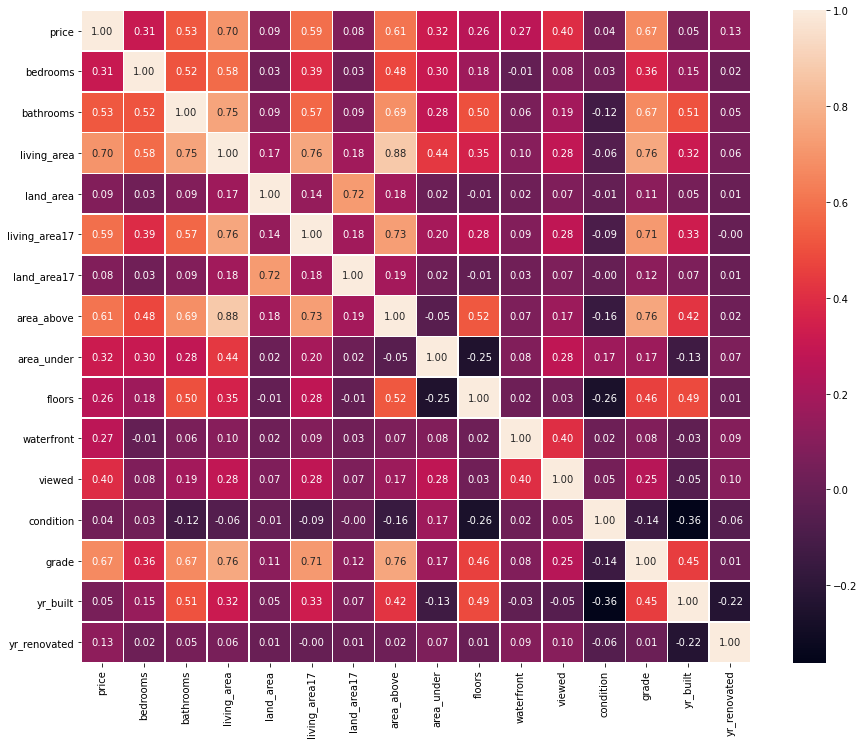

In [8]:
#  plot heat map

fig, ax = plt.subplots(figsize = (15,12))
sns.heatmap(corr_mtx, annot = True, linewidths = 0.5, fmt = '0.2f', ax = ax)

In [9]:
# remove some columns that are likely not to be used anymore (2nd round)

house = house.drop(columns = ['land_area', 'land_area17', 'condition', 'yr_built', 'yr_renovated'])
house

,price,bedrooms,bathrooms,living_area,living_area17,area_above,area_under,floors,waterfront,viewed,grade
0,300000.0,6,3.00,2400,2060,2400,0,2.0,0,0,7
1,647500.0,4,1.75,2060,2590,1160,900,1.0,0,0,8
2,400000.0,3,1.00,1460,2250,1460,0,1.0,0,0,7
3,235000.0,3,1.00,1430,1290,1010,420,1.5,0,0,6
4,402500.0,4,2.00,1650,1480,760,890,1.0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...
21607,365000.0,5,2.00,1600,1190,1600,0,1.5,0,0,7
21608,380000.0,2,1.00,1040,1930,840,200,1.0,0,0,7
21609,339000.0,3,1.00,1100,1510,720,380,1.0,0,0,7
21610,399900.0,2,1.75,1410,1440,900,510,1.5,0,0,9


In [10]:
# Standardize data (convert to z-score)

scaler = StandardScaler()

house_std = pd.DataFrame(scaler.fit_transform(house), columns = house.columns)

house_std        #   show data

,price,bedrooms,bathrooms,living_area,living_area17,area_above,area_under,floors,waterfront,viewed,grade
0,-0.653842,2.827518,1.149511,0.348543,0.107166,0.738621,-0.658703,0.936546,-0.087175,-0.305767,-0.558853
1,0.292101,0.676725,-0.473572,-0.021651,0.880448,-0.758818,1.374871,-0.915381,-0.087175,-0.305767,0.291885
2,-0.381628,-0.398671,-1.447421,-0.674934,0.384380,-0.396534,-0.658703,-0.915381,-0.087175,-0.305767,-0.558853
3,-0.830781,-0.398671,-1.447421,-0.707598,-1.016280,-0.939960,0.290298,0.010583,-0.087175,-0.305767,-1.409591
4,-0.374823,0.676725,-0.148955,-0.468061,-0.739066,-1.241863,1.352276,-0.915381,-0.087175,-0.305767,-0.558853
...,...,...,...,...,...,...,...,...,...,...,...
21607,-0.476903,1.752122,-0.148955,-0.522501,-1.162182,-0.227469,-0.658703,0.010583,-0.087175,-0.305767,-0.558853
21608,-0.436071,-1.474067,-1.447421,-1.132232,-0.082506,-1.145254,-0.206798,-0.915381,-0.087175,-0.305767,-0.558853
21609,-0.547679,-0.398671,-1.447421,-1.066903,-0.695295,-1.290167,0.199917,-0.915381,-0.087175,-0.305767,-0.558853
21610,-0.381901,-1.474067,-0.473572,-0.729374,-0.797427,-1.072797,0.493656,0.010583,-0.087175,-0.305767,1.142623


In [13]:
X = house_std[['bedrooms', 'bathrooms', 'living_area', 'living_area17', 'area_above',
           'area_under', 'floors', 'waterfront', 'viewed', 'grade']]

X.head()  #  show data

,bedrooms,bathrooms,living_area,living_area17,area_above,area_under,floors,waterfront,viewed,grade
0,2.827518,1.149511,0.348543,0.107166,0.738621,-0.658703,0.936546,-0.087175,-0.305767,-0.558853
1,0.676725,-0.473572,-0.021651,0.880448,-0.758818,1.374871,-0.915381,-0.087175,-0.305767,0.291885
2,-0.398671,-1.447421,-0.674934,0.384380,-0.396534,-0.658703,-0.915381,-0.087175,-0.305767,-0.558853
3,-0.398671,-1.447421,-0.707598,-1.016280,-0.939960,0.290298,0.010583,-0.087175,-0.305767,-1.409591
4,0.676725,-0.148955,-0.468061,-0.739066,-1.241863,1.352276,-0.915381,-0.087175,-0.305767,-0.558853


In [14]:
Y = house_std['price']

Y.head()    #   show data

0   -0.653842
1    0.292101
2   -0.381628
3   -0.830781
4   -0.374823
Name: price, dtype: float64

In [15]:
# Split data -> train / test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

In [16]:
# train model

lireg = LinearRegression()
lireg.fit(X_train, y_train)

LinearRegression()

In [17]:
# predict

y_predict = lireg.predict(X_test)

In [22]:
mean_squared_error(y_predict, y_test)     #   mean square error

0.38182772243992663

In [23]:
mean_absolute_error(y_predict, y_test)      #  mean absolute error

0.4179008599881765

![image](../questions/q3.jpg)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder                 # to transform data format
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

In [57]:
basket = pd.read_csv('../input/basket.csv')

In [58]:
basket.head()     #   show data

,Shrimp,Summer Sausage,Strawberry Soda,Vanilla Ice Cream,Potato Chips,Strawberry Yogurt,Plain White Bread,Blueberry Yogurt,Frozen Chicken Thighs,Mixed Vegetables,...,Plain Muffins,Cheese Dip,Colby Cheese,Chicken Noodle Soup,Fingernail Clippers,Corned Beef,Lollipops,Toilet Paper,White Wine,Columbian Coffee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
basket.info()     #  see type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Columns: 255 entries,  Shrimp to  Columbian Coffee
dtypes: int64(255)
memory usage: 2.6 MB


In [60]:
basket.describe()

,Shrimp,Summer Sausage,Strawberry Soda,Vanilla Ice Cream,Potato Chips,Strawberry Yogurt,Plain White Bread,Blueberry Yogurt,Frozen Chicken Thighs,Mixed Vegetables,...,Plain Muffins,Cheese Dip,Colby Cheese,Chicken Noodle Soup,Fingernail Clippers,Corned Beef,Lollipops,Toilet Paper,White Wine,Columbian Coffee
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,...,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.00000,1361.000000,1361.000000,1361.000000
mean,0.007348,0.038207,0.006613,0.008082,0.097722,0.036738,0.008082,0.027921,0.030125,0.035268,...,0.011756,0.030860,0.032329,0.039677,0.021308,0.023512,0.04335,0.074210,0.024982,0.030125
std,0.085434,0.191767,0.081080,0.089570,0.297048,0.188186,0.089570,0.164806,0.170994,0.184525,...,0.107826,0.173001,0.176938,0.195270,0.144462,0.151579,0.20372,0.262209,0.156126,0.170994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [61]:
bk_convert = basket.replace( {0: False, 1: True} )   #   convert data
bk_convert

,Shrimp,Summer Sausage,Strawberry Soda,Vanilla Ice Cream,Potato Chips,Strawberry Yogurt,Plain White Bread,Blueberry Yogurt,Frozen Chicken Thighs,Mixed Vegetables,...,Plain Muffins,Cheese Dip,Colby Cheese,Chicken Noodle Soup,Fingernail Clippers,Corned Beef,Lollipops,Toilet Paper,White Wine,Columbian Coffee
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1357,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1358,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1359,False,True,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,True,False,False


In [62]:
bk_convert.info()    #   see type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Columns: 255 entries,  Shrimp to  Columbian Coffee
dtypes: bool(255)
memory usage: 339.0 KB


## apriori

In [63]:
# select support is more than 0.025 & max number of items are 2

frequent_itemsets1 = apriori(bk_convert, min_support = 0.025, max_len = 2, use_colnames = True)
frequent_itemsets1

,support,itemsets
0,0.038207,( Summer Sausage)
1,0.097722,( Potato Chips)
2,0.036738,( Strawberry Yogurt)
3,0.027921,( Blueberry Yogurt)
4,0.030125,( Frozen Chicken Thighs)
...,...,...
378,0.029390,"( Toilet Paper, Toothpaste)"
379,0.026451,"( Sweet Relish, Ramen Noodles)"
380,0.030860,"( Sweet Relish, Wheat Bread)"
381,0.027921,"( Toilet Paper, Wheat Bread)"


In [64]:
# confidence is more than 0.6

frequent_itemsets1 = association_rules(frequent_itemsets1, metric = "confidence", min_threshold = 0.6)
frequent_itemsets1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888
2,( Sugar Cookies),( White Bread),0.055107,0.119030,0.035268,0.640000,5.376790,0.028709,2.447139
3,( Salsa Dip),( Eggs),0.049963,0.122704,0.030860,0.617647,5.033639,0.024729,2.294467
4,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
5,( Raisins),( Eggs),0.060985,0.122704,0.036738,0.602410,4.909458,0.029255,2.206533
6,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
7,( Tomatoes),( White Bread),0.066128,0.119030,0.040411,0.611111,5.134088,0.032540,2.265351
8,( Plain Bagels),( Eggs),0.044085,0.122704,0.026451,0.600000,4.889820,0.021042,2.193240
9,( Toothpaste),( White Bread),0.079353,0.119030,0.047759,0.601852,5.056299,0.038314,2.212669


In [65]:
#  sort lift value

frequent_itemsets1 = frequent_itemsets1.sort_values(by = ['lift'],ascending = False)
frequent_itemsets1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
11,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
6,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888
2,( Sugar Cookies),( White Bread),0.055107,0.119030,0.035268,0.640000,5.376790,0.028709,2.447139
7,( Tomatoes),( White Bread),0.066128,0.119030,0.040411,0.611111,5.134088,0.032540,2.265351
10,( Canned Tuna),( White Bread),0.054372,0.119030,0.033064,0.608108,5.108859,0.026592,2.247992
9,( Toothpaste),( White Bread),0.079353,0.119030,0.047759,0.601852,5.056299,0.038314,2.212669
3,( Salsa Dip),( Eggs),0.049963,0.122704,0.030860,0.617647,5.033639,0.024729,2.294467


In [66]:
top5 = frequent_itemsets1.head()
top5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
11,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
6,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888


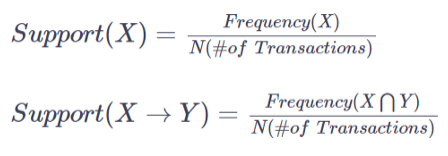

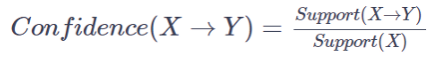

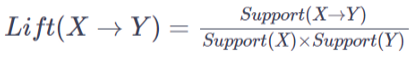

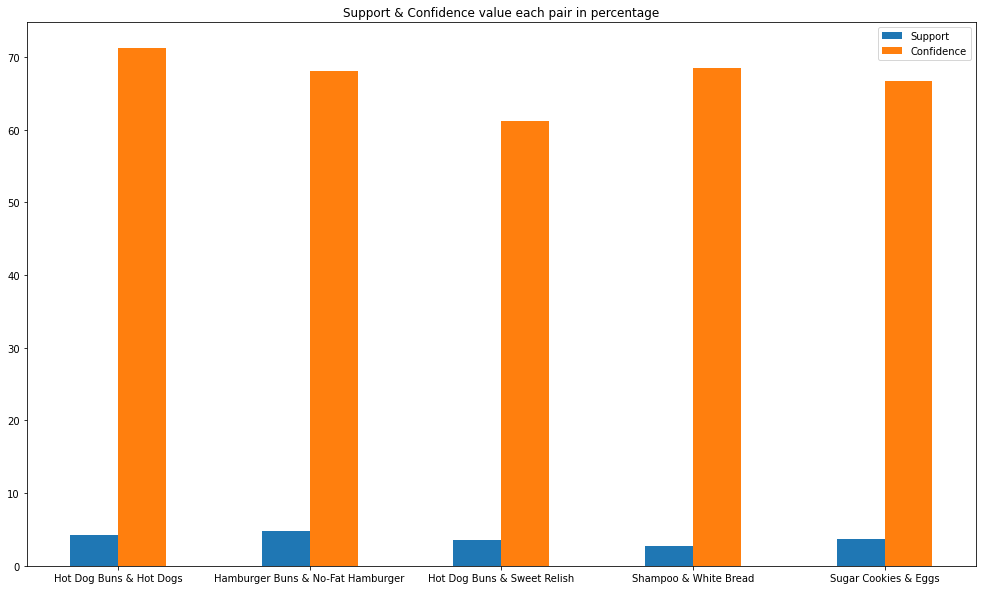

In [67]:
N = 5                                   # Numbers of pairs

# Data on X-axis

sup_bar = top5['support']*100           # Specify the values of bars (percentage)
conf_bar = top5['confidence']*100       # Specify the values of bars (percentage)

ind = np.arange(N)                      # Position of bars on x-axis

plt.figure(figsize = (17, 10))          # Figure size
 
width = 0.25                            # Width of a bar

# Plotting
plt.bar(ind, sup_bar, width, label = 'Support')
plt.bar(ind + width, conf_bar, width, label = 'Confidence')

plt.title('Support & Confidence value each pair in percentage')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width/2), ('Hot Dog Buns & Hot Dogs', 'Hamburger Buns & No-Fat Hamburger',
                             'Hot Dog Buns & Sweet Relish', 'Shampoo & White Bread',
                             'Sugar Cookies & Eggs'))

# Finding the best position for legends
plt.legend(loc = 'best')
plt.show()

## fp growth

In [68]:
# select support is more than 0.025 & max number of items are 2

frequent_itemsets2 = fpgrowth(bk_convert, min_support = 0.025, max_len = 2, use_colnames = True)
frequent_itemsets2

,support,itemsets
0,0.033799,( Peaches)
1,0.040411,( Vegetable Oil)
2,0.030860,( Frozen Corn)
3,0.055841,( Plums)
4,0.057311,( Pancake Mix)
...,...,...
378,0.030125,"( Oranges, White Bread)"
379,0.030125,"( Eggs, Oranges)"
380,0.028655,"( Eggs, Mushrooms)"
381,0.026451,"( Mushrooms, 2pct. Milk)"


In [69]:
# confidence is more than 0.6

frequent_itemsets2 = association_rules(frequent_itemsets2, metric = "confidence", min_threshold = 0.6)
frequent_itemsets2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888
2,( Sugar Cookies),( White Bread),0.055107,0.119030,0.035268,0.640000,5.376790,0.028709,2.447139
3,( Salsa Dip),( Eggs),0.049963,0.122704,0.030860,0.617647,5.033639,0.024729,2.294467
4,( Toothpaste),( White Bread),0.079353,0.119030,0.047759,0.601852,5.056299,0.038314,2.212669
5,( Tomatoes),( White Bread),0.066128,0.119030,0.040411,0.611111,5.134088,0.032540,2.265351
6,( Canned Tuna),( White Bread),0.054372,0.119030,0.033064,0.608108,5.108859,0.026592,2.247992
7,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
8,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
9,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375


In [70]:
frequent_itemsets2 = frequent_itemsets2.sort_values(by = ['lift'],ascending = False)
frequent_itemsets2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
8,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
9,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888
2,( Sugar Cookies),( White Bread),0.055107,0.119030,0.035268,0.640000,5.376790,0.028709,2.447139
5,( Tomatoes),( White Bread),0.066128,0.119030,0.040411,0.611111,5.134088,0.032540,2.265351
6,( Canned Tuna),( White Bread),0.054372,0.119030,0.033064,0.608108,5.108859,0.026592,2.247992
4,( Toothpaste),( White Bread),0.079353,0.119030,0.047759,0.601852,5.056299,0.038314,2.212669
3,( Salsa Dip),( Eggs),0.049963,0.122704,0.030860,0.617647,5.033639,0.024729,2.294467


In [71]:
top5 = frequent_itemsets2.head()
top5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
8,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
9,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888


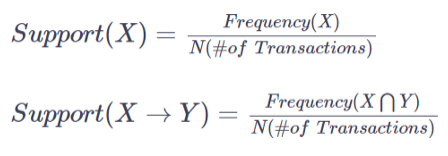

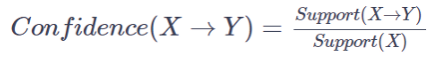

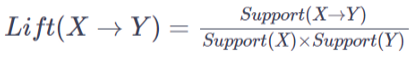

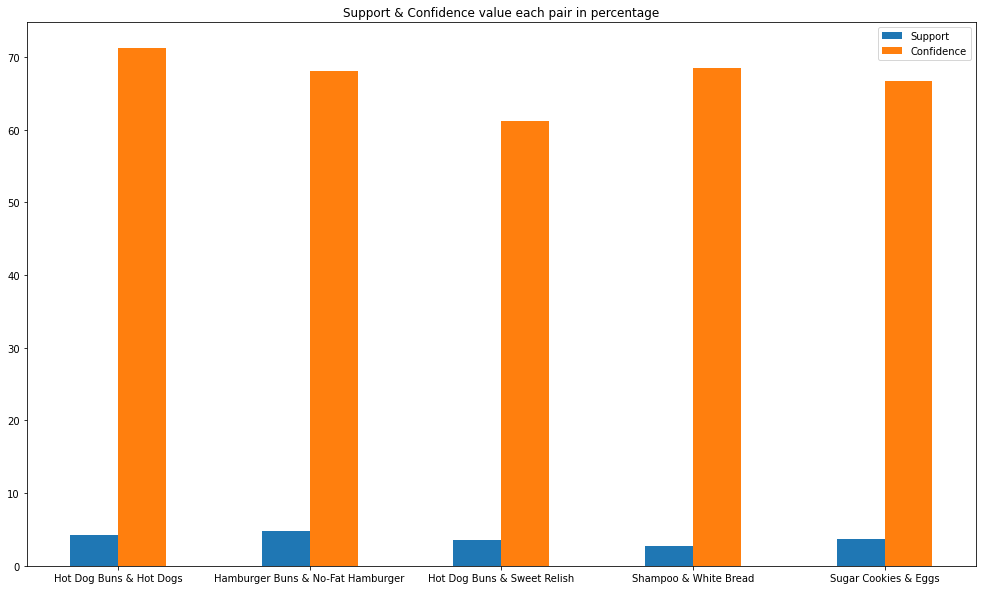

In [73]:
N = 5                                   # Numbers of pairs

# Data on X-axis

sup_bar = top5['support']*100           # Specify the values of bars (percentage)
conf_bar = top5['confidence']*100       # Specify the values of bars (percentage)

ind = np.arange(N)                      # Position of bars on x-axis

plt.figure(figsize = (17, 10))          # Figure size
 
width = 0.25                            # Width of a bar

# Plotting
plt.bar(ind, sup_bar, width, label = 'Support')
plt.bar(ind + width, conf_bar, width, label = 'Confidence')

plt.title('Support & Confidence value each pair in percentage')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width/2), ('Hot Dog Buns & Hot Dogs', 'Hamburger Buns & No-Fat Hamburger',
                             'Hot Dog Buns & Sweet Relish', 'Shampoo & White Bread',
                             'Sugar Cookies & Eggs'))

# Finding the best position for legends
plt.legend(loc = 'best')
plt.show()